<a href="https://colab.research.google.com/github/gmvenge/ASDFG/blob/master/ClassificationWithDeepAndMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One in seven U.S. adults has diabetes now, according to the Centers for Disease Control and Prevention. Expectedly 2050, the rate could skyrocket to as many as one in three. With this in mind, this is what we are going to do today: Learning how to use Machine Learning to help us predict Diabetes. Let’s get started!

#The Data

The diabetes data set was originated from UCI Machine Learning Repository

The detailed attributes in the dataset are listed below:


*   Number of times pregnant (Pregnancies)
*   Plasma glucose concentration at 2h in an oral glucose tolerance test(Glucose)
*   Diastolic blood pressure (BloodPressure)
*   Triceps skin fold thickness (SkinThickness)
*  2-h serum insulin (Insulin) 
*   Body Mass Index (BMI)
*   Diabetes pedigree function (DiabetesPedigreeFunction)
*   Age (Age)
*   Class variable (Outcome)












In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import  f1_score, precision_score, recall_score, classification_report

In [0]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [0]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [0]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
zero_not_accepted = [ 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'Insulin']

In [0]:
for column in zero_not_accepted:
  diabetes[column] = diabetes[column].replace(0, np.NaN)
  mean = int(diabetes[column].mean(skipna= True))
  diabetes[column] = diabetes[column].replace(np.NaN, mean)


In [0]:
print(diabetes['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [0]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [0]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


O means No Diabetes
1 means Diabetes

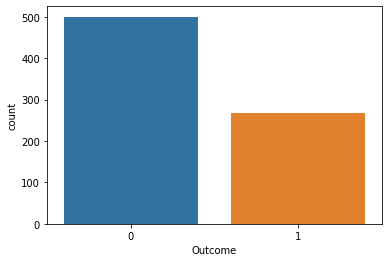

In [0]:
sns.countplot(diabetes['Outcome'],label="Count")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


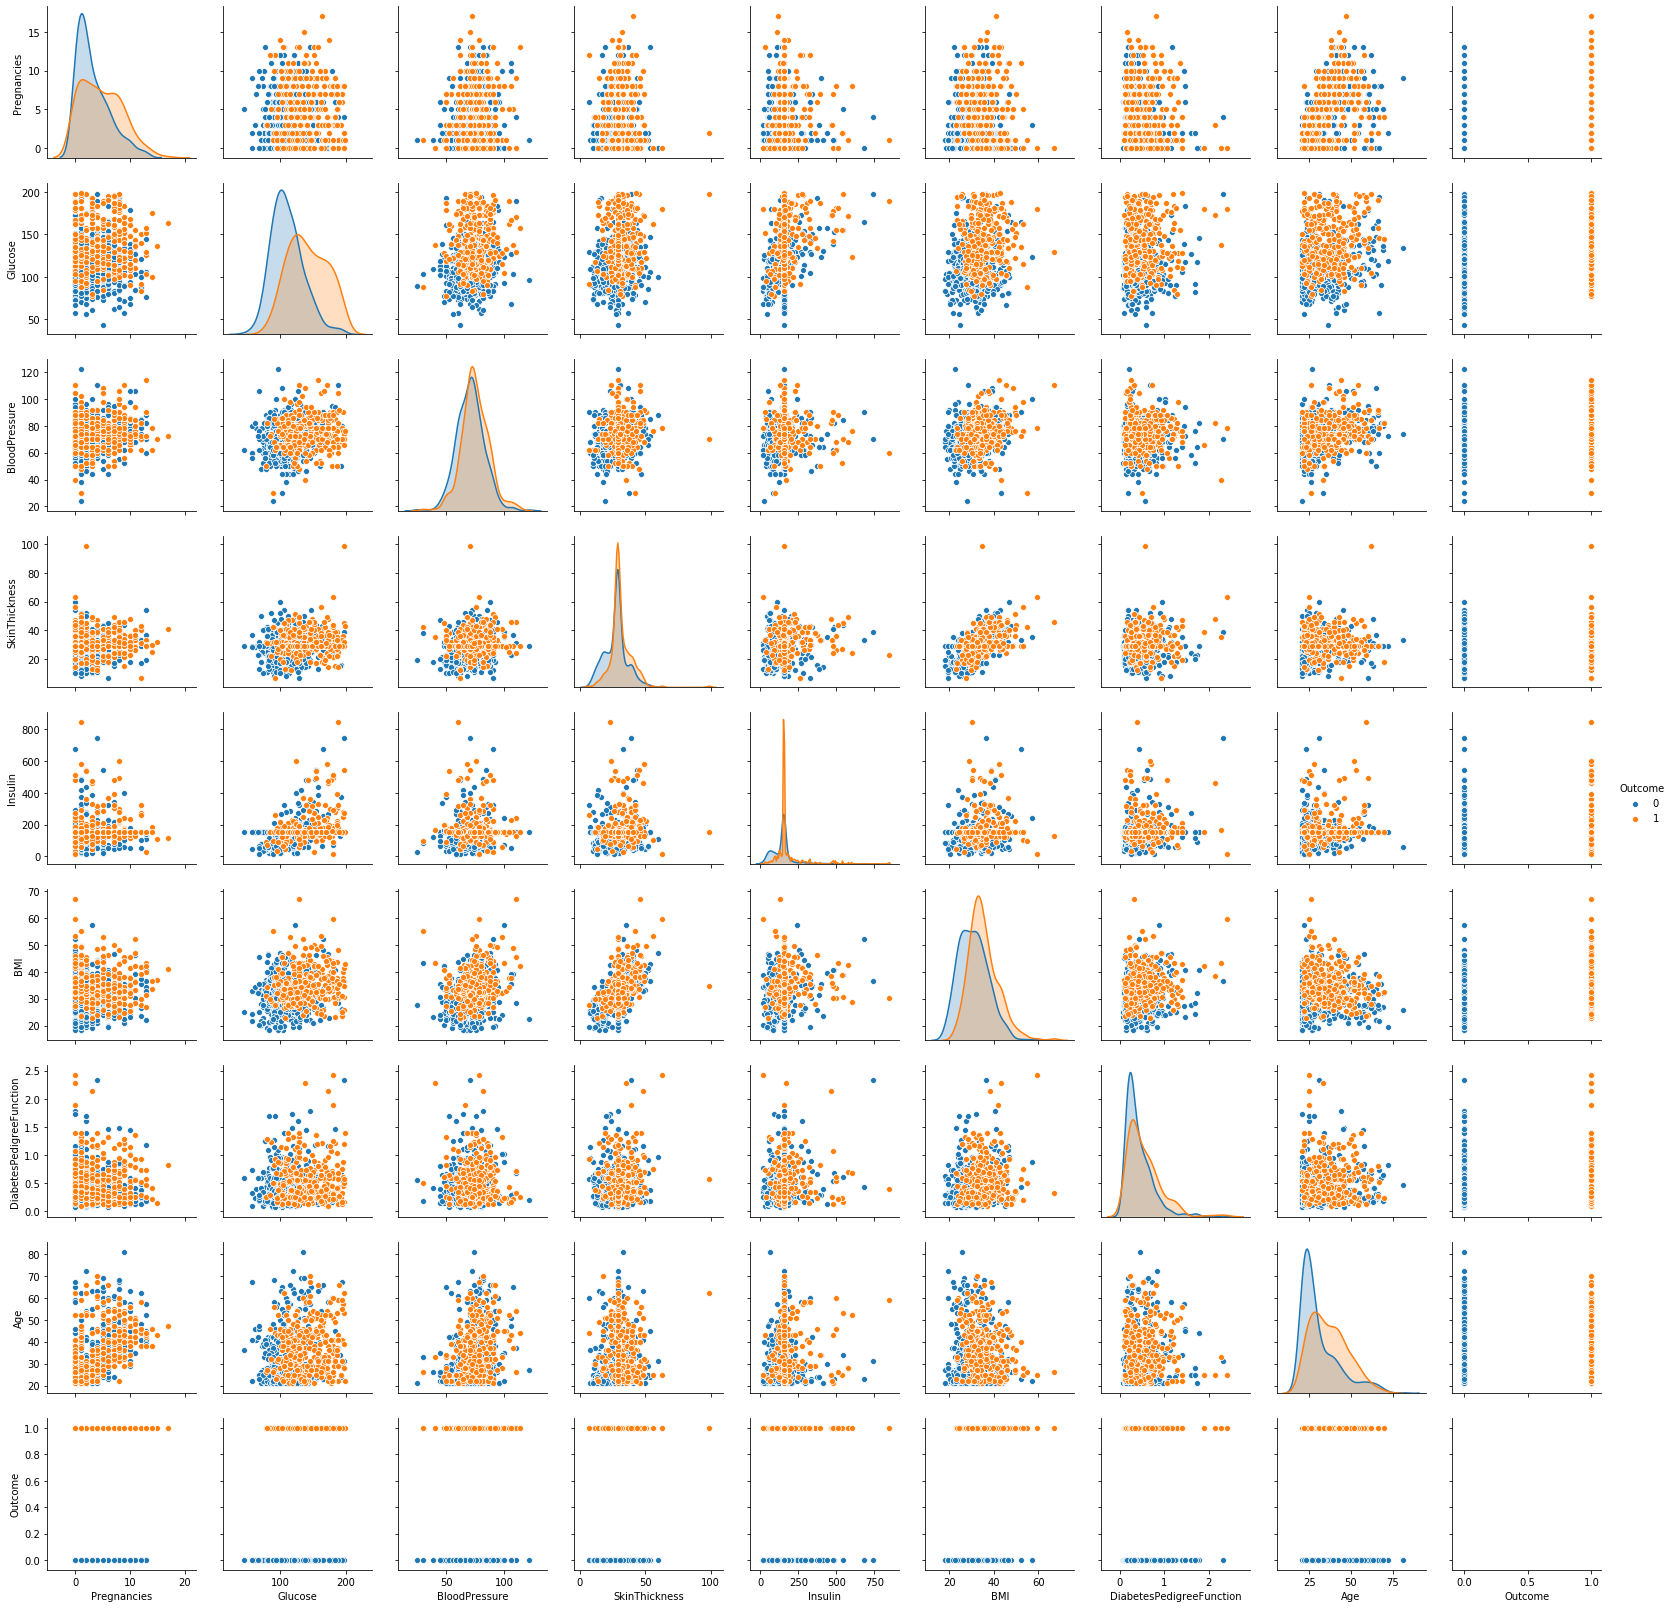

In [0]:
# Detailed distribution of the features in the dataset
sns.pairplot(data=diabetes, hue='Outcome')
plt.show()

In [0]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#Correlation Matrix
A matrix of correlations provides useful insight into relationships between pairs of variables.

In [0]:
feature_names = diabetes.columns[:8]

In [0]:
X = diabetes[feature_names]
y = diabetes.Outcome

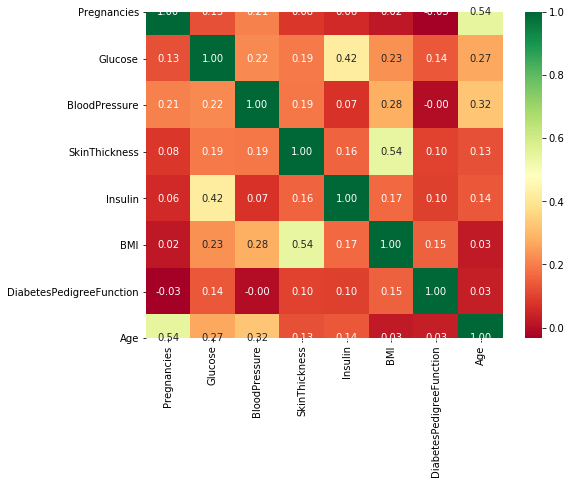

In [0]:
sns.heatmap(
    X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

fig = plt.gcf()
fig.set_size_inches(8, 6)

plt.show()

k-Nearest Neighbors


The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training data set. To make a prediction for a new data point, the algorithm finds the closest data points in the training data set — its “nearest neighbors.”

In [0]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

In [0]:
X = diabetes.iloc[:,0:8]
y = diabetes.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20)

In [0]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Defining the model

In [0]:
classifier = KNeighborsClassifier(n_neighbors=11, p= 2, metric = 'euclidean')

In [0]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94 13]
 [15 32]]


In [0]:
print(f1_score(y_test, y_pred))

0.6956521739130436


In [0]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


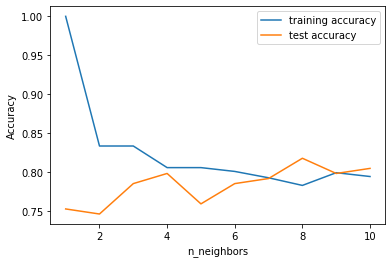

In [0]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [0]:
#Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression(solver = 'lbfgs') 
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.81


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.76
Test set accuracy: 0.78


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.2f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.77
Test set accuracy: 0.81


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


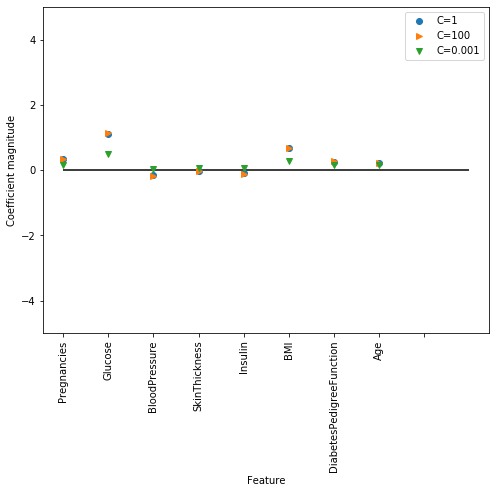

In [0]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '>', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

Using C=1 and C=100 produced the same score. Thus we will use default C=1.

#DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.69


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set

In [0]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.76


Feature Importance in Decision Trees
Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”. The feature importances always sum to 1:

In [0]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.60203037 0.         0.         0.         0.25291271
 0.         0.14505692]


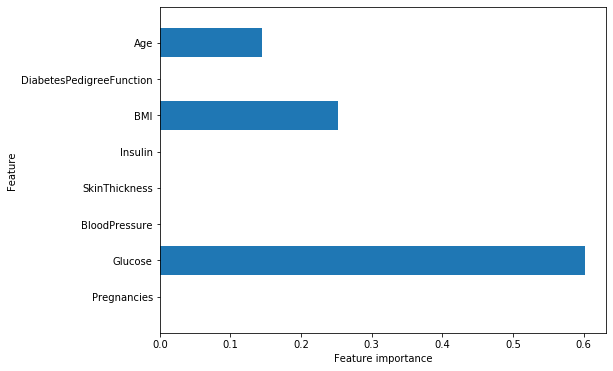

In [0]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

Thus Glucose is the most important feature

#Random Forest
consisting of 100 trees on the diabetis data

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.81


The random forest gives us an accuracy of 81%, better than the logistic regression model or a single decision tree, without tuning any parameters. However, we can adjust the max_features setting, to see whether the result can be improved

In [0]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.82


It did not, this indicates that the default parameters of the random forest work well.

Feature Importance in Random Forests

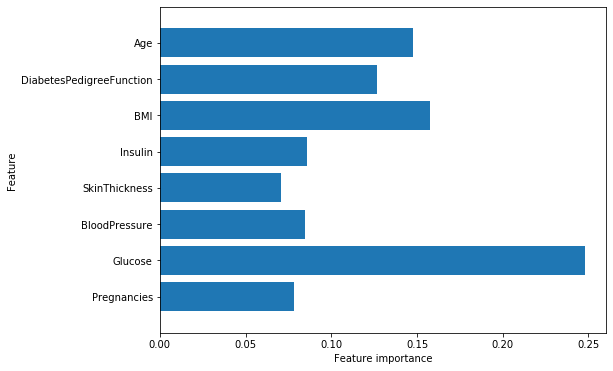

In [0]:
plot_feature_importances_diabetes(rf)

Similarly to the single decision tree, the random forest also gives a lot of importance to the “Glucose” feature, but it also chooses “BMI” to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree

#Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.81


We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [0]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.79


In [0]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.79


No changes to the model accuracy

We can visualize the feature importances to get more insight into our model even though we are not really happy with the model:

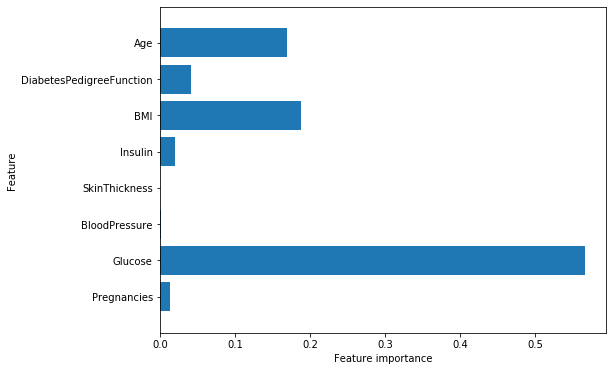

In [0]:
plot_feature_importances_diabetes(gb1)

Glucose is the most imporatnt feature

#Support Vector Machine

In [0]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.82
Accuracy on test set: 0.77


The model overfits quite substantially, with a perfect score on the training set and only 77% accuracy on the test set.

SVM requires all the features to vary on a similar scale. We will need to re-scale our data that all the features are approximately on the same scale:

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.79


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Scaling the data made a huge difference! Now we are actually underfitting, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model

In [0]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.81
Accuracy on test set: 0.77


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#Deep Learning

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.81
Accuracy on test set: 0.81


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The accuracy of the Multilayer perceptrons (MLP) is not as good as the other models at all, this is likely due to scaling of the data. deep learning algorithms also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must re-scale our data so that it fulfills these requirements.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.82
Accuracy on test set: 0.80


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy increased on training set but fell on test set

In [0]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.81


Finally, we plot a heat map of the first layer weights in a neural network learned on the diabetes dataset.

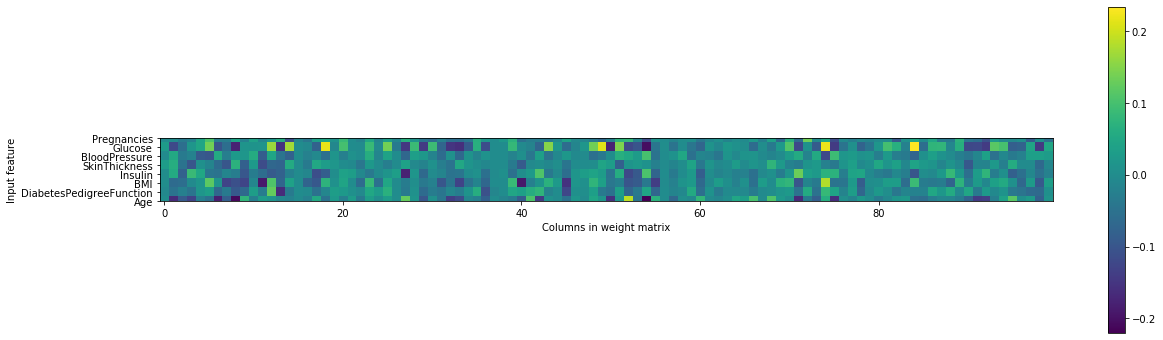

In [0]:
plt.figure(figsize=(20, 6))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

From the heat map, it is not easy to point out quickly that which feature (features) have relatively low weights compared to the other features.